In [29]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.formula.api import logit

In [30]:
data = pd.read_csv(r'c:/temp/heart.csv')
# data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

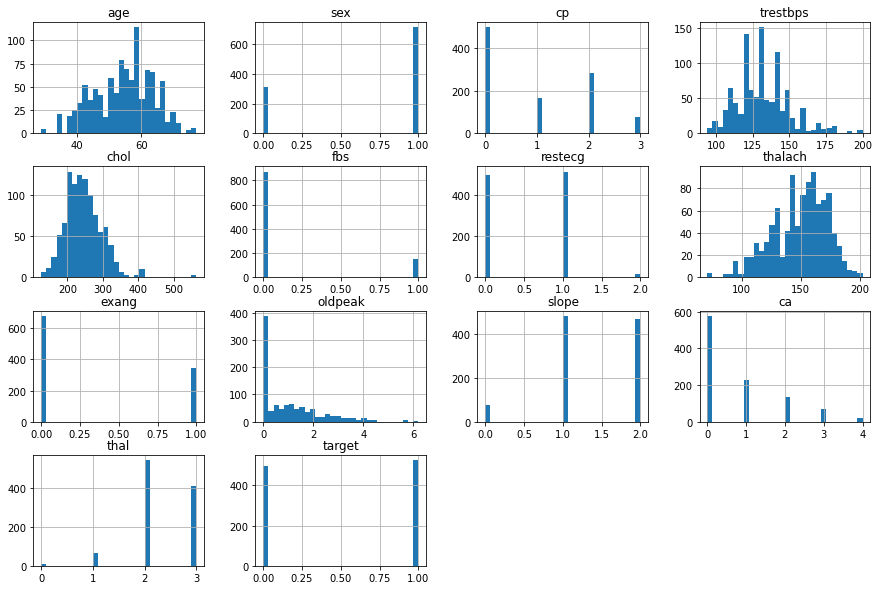

In [32]:
data.hist(bins=30, figsize=(15, 10))

In [33]:
data.target.value_counts(dropna=False)

1    526
0    499
Name: target, dtype: int64

In [34]:
X = data.drop(columns = 'target')
y = data['target']

# X_scaled = StandardScaler()
# X_scaled = X_scaled.fit_transform(X)

In [41]:
formula = ('target ~ age + sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal')
model=logit(formula = formula, data = data)
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Mon, 22 Aug 2022   Pseudo R-squ.:                  0.4938
Time:                        21:31:45   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
Covariance Type:            nonrobust   LLR p-value:                1.777e-141
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6902      1.401      2.633      0.008       0.944       6.437
age           -0.0082      0.013     -0.650      0.516      -0.033       0.017
sex           -1.8465      0.257     -7.197      0.000      -2.349      -1.344
cp             0.8546      0.100      8.516      0.000       0.658       1.051
trestbps      -0.0182      0.006     -3.245      0.001      -0.029      -0.007
chol          -0.0057      0.002     -2.757      0.006      -0.010      -0.002
fbs           -0.1012      0.285     -0.355      0.723      -0.659       0.457
restecg        0.4132      0.189      2.187      0.029       0.043       0.784
thalach        0.0236      0.006      4.158      0.000       0.012       0.035
exang         -0.9908      0.224     -4.418      0.000      -1.430      -0.551
oldpeak       -0.5707      0.116     -4.920      0.000      -0.798      -0.343
slope          0.5341      0.189      2.831      0.005       0.164       0.904
ca            -0.7545      0.103     -7.321      0.000      -0.956      -0.553
thal          -0.8861      0.156     -5.693      0.000      -1.191      -0.581
==============================================================================
"""

In [53]:
AME = result.get_margeff(at='mean', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:                 target
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0020      0.003     -0.650      0.516      -0.008       0.004
sex           -0.4595      0.064     -7.157      0.000      -0.585      -0.334
cp             0.2127      0.025      8.566      0.000       0.164       0.261
trestbps      -0.0045      0.001     -3.248      0.001      -0.007      -0.002
chol          -0.0014      0.001     -2.758      0.006      -0.002      -0.000
fbs           -0.0252      0.071     -0.355      0.722      -0.164       0.114
restecg        0.1028      0.047      2.189      0.029       0.011       0.195
thalach        0.0059      0.001      4.176      0.000       0.003       0.009
exang         -0.2465      0.056     -4.423      0.000    

In [56]:
AME2 = result.get_margeff(at='mean', method='dydx', atexog=['age'])
print(AME2.summary())

        Logit Marginal Effects       
Dep. Variable:                 target
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0020      0.003     -0.650      0.516      -0.008       0.004
sex           -0.4595      0.064     -7.157      0.000      -0.585      -0.334
cp             0.2127      0.025      8.566      0.000       0.164       0.261
trestbps      -0.0045      0.001     -3.248      0.001      -0.007      -0.002
chol          -0.0014      0.001     -2.758      0.006      -0.002      -0.000
fbs           -0.0252      0.071     -0.355      0.722      -0.164       0.114
restecg        0.1028      0.047      2.189      0.029       0.011       0.195
thalach        0.0059      0.001      4.176      0.000       0.003       0.009
exang         -0.2465      0.056     -4.423      0.000    